In [1]:
!pip install -U --no-cache-dir gdown --pre

!rm -rf data && mkdir data

!gdown 1WAVwLBh9Jhq8fD6CpprKCRreUMlH9PrP -O data2.zip

!unzip -q data2.zip -d data

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From (original): https://drive.google.com/uc?id=1WAVwLBh9Jhq8fD6CpprKCRreUMlH9PrP
From (redirected): https://drive.google.com/uc?id=1WAVwLBh9Jhq8fD6CpprKCRreUMlH9PrP&confirm=t&uuid=670d856e-f6bd-407d-9ee6-42a96b24d568
To: /content/data2.zip
100% 60.2M/60.2M [00:03<00:00, 18.2MB/s]


In [2]:
!ls data

apple  avocado	banana	kiwi  mandarin	orange	pear  pepper  potato  tomato


#Max 250 images per class

In [3]:
import os
import shutil

def remove_imgs(directory, max=250):
    files = os.listdir(directory)

    # if exceeds max
    if len(files) > max:
        # number to remove
        ilosc_do_usuniecia = len(files) - max

        # remove files
        for i in range(ilosc_do_usuniecia):
            remove_path = os.path.join(directory, files[i])
            os.remove(remove_path)
            print(f"Deleted: {remove_path}")

        print(f"number of files: {len(os.listdir(directory))}")
    else:
        print(f"Directory '{directory}' doesn't exceed limit")


cls = os.listdir('data')
for i in range(10):
  path = f'data/{cls[i]}'
  remove_imgs(path)

Directory 'data/kiwi' doesn't exceed limit
Directory 'data/mandarin' doesn't exceed limit
Deleted: data/banana/IMG_9236.JPG
Deleted: data/banana/IMG_8625.JPG
Deleted: data/banana/r_236_100.jpg
Deleted: data/banana/r2_46_100.jpg
Deleted: data/banana/IMG_9198.JPG
Deleted: data/banana/IMG_0128.JPG
Deleted: data/banana/IMG_8800.JPG
Deleted: data/banana/IMG_9310.JPG
Deleted: data/banana/25_100.jpg
Deleted: data/banana/IMG_9164.JPG
Deleted: data/banana/IMG_9396.JPG
Deleted: data/banana/158_100(1).jpg
Deleted: data/banana/IMG_9049.JPG
Deleted: data/banana/r2_95_100.jpg
Deleted: data/banana/r_237_100.jpg
Deleted: data/banana/IMG_9440.JPG
Deleted: data/banana/r_16_100.jpg
Deleted: data/banana/51_100.jpg
Deleted: data/banana/IMG_8966.JPG
Deleted: data/banana/IMG_8963.JPG
Deleted: data/banana/IMG_8838.JPG
Deleted: data/banana/316_100.jpg
Deleted: data/banana/IMG_9185.JPG
Deleted: data/banana/IMG_8568.JPG
Deleted: data/banana/14_100.jpg
Deleted: data/banana/13_100.jpg
Deleted: data/banana/IMG_8982

In [ ]:
import os
for i in range(10):
  print(len(os.listdir(f'data/{cls[i]}')))

156
166
250
160
250
250
250
250
250
250


#Model

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import glob
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

batch_size = 64
class_count = 10

img_height = 100
img_width = 100

print(os.getcwd())

train_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  subset = "training",
  validation_split = 0.2,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  'data',
  subset = 'validation',
  validation_split = 0.5,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


class_names = train_ds.class_names
print(f'class names: {class_names}')


train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

#Model
def get_model(type='custom'):
  model = None

  if type == 'vgg16':
    model = tf.keras.applications.vgg16.VGG16(
    include_top=True,
    weights = None,
    input_tensor=None,
    input_shape=(img_height, img_width, 3),
    pooling=None,
    classes=10,
    classifier_activation='softmax'
)

  elif type == 'custom':
    model = Sequential([
      layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
      layers.Conv2D(16, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(class_count)
    ])

  return model


model = get_model('vgg16')
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()
epochs=25

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

/content
Found 2232 files belonging to 10 classes.
Using 1786 files for training.
Found 2232 files belonging to 10 classes.
Using 1116 files for validation.
class names: ['apple', 'avocado', 'banana', 'kiwi', 'mandarin', 'orange', 'pear', 'pepper', 'potato', 'tomato']
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       7

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


28/28 [==============================] - 12s 228ms/step - loss: 45.3880 - accuracy: 0.1097 - val_loss: 2.2950 - val_accuracy: 0.1022
Epoch 2/25
28/28 [==============================] - 6s 213ms/step - loss: 2.2577 - accuracy: 0.1489 - val_loss: 2.1989 - val_accuracy: 0.1649
Epoch 3/25
28/28 [==============================] - 6s 215ms/step - loss: 2.0818 - accuracy: 0.2083 - val_loss: 2.1508 - val_accuracy: 0.1989
Epoch 4/25
28/28 [==============================] - 6s 215ms/step - loss: 1.6754 - accuracy: 0.3483 - val_loss: 1.1600 - val_accuracy: 0.5287
Epoch 5/25
28/28 [==============================] - 6s 216ms/step - loss: 0.9792 - accuracy: 0.6142 - val_loss: 0.7807 - val_accuracy: 0.7079
Epoch 6/25
28/28 [==============================] - 6s 215ms/step - loss: 0.9266 - accuracy: 0.6618 - val_loss: 0.7806 - val_accuracy: 0.7267
Epoch 7/25
28/28 [==============================] - 6s 216ms/step - loss: 0.5983 - accuracy: 0.7816 - val_loss: 0.3738 - val_accuracy: 0.8602
Epoch 8/25
28/2

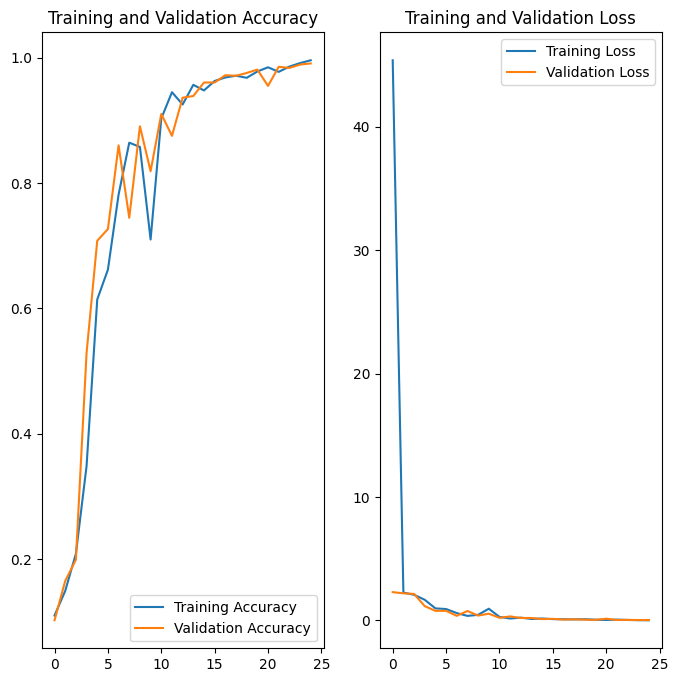

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
from sklearn.metrics import classification_report
def evaluate_model(val_ds, model):
    y_pred = []
    y_true = []

    for batch_images, batch_labels in val_ds:
        predictions = model.predict(batch_images, verbose=0)
        y_pred = y_pred + np.argmax(tf.nn.softmax(predictions), axis=1).tolist()
        y_true = y_true + batch_labels.numpy().tolist()
    print(classification_report(y_true, y_pred))

evaluate_model(val_ds, model)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       129
           1       1.00      1.00      1.00       129
           2       0.96      0.96      0.96       114
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        67
           5       0.99      1.00      0.99        81
           6       1.00      1.00      1.00       127
           7       1.00      1.00      1.00       122
           8       1.00      1.00      1.00       142
           9       1.00      1.00      1.00       121

    accuracy                           0.99      1116
   macro avg       0.99      0.99      0.99      1116
weighted avg       0.99      0.99      0.99      1116



#Download prediction test data

In [7]:
!pip install -U --no-cache-dir gdown --pre

!rm -rf test && mkdir test

!gdown 1HZ12djYn5WtWx6nuWxkJQwCaNrFm-4g4 -O test_pic.zip

!unzip -q test_pic.zip -d test

Downloading...
From (original): https://drive.google.com/uc?id=1HZ12djYn5WtWx6nuWxkJQwCaNrFm-4g4
From (redirected): https://drive.google.com/uc?id=1HZ12djYn5WtWx6nuWxkJQwCaNrFm-4g4&confirm=t&uuid=381e20d9-aa76-41bb-8129-16a236fd6a07
To: /content/test_pic.zip
100% 84.5M/84.5M [00:03<00:00, 25.9MB/s]


#Prediction test images

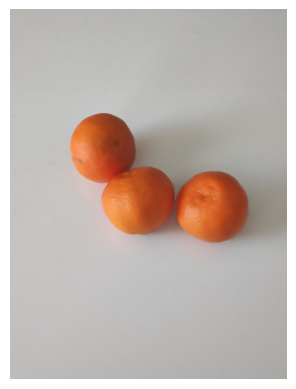

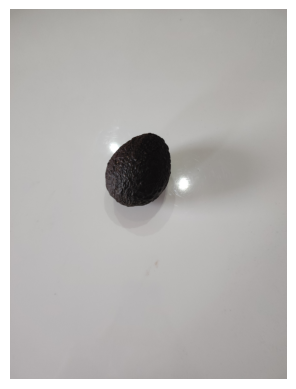

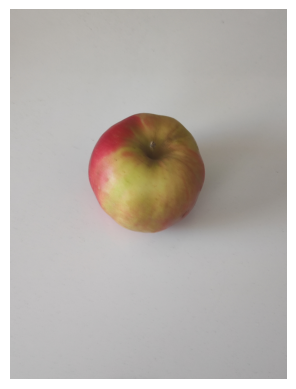

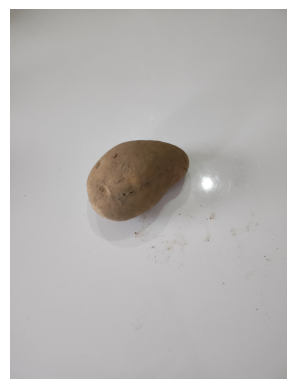

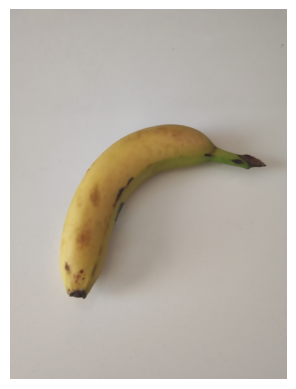

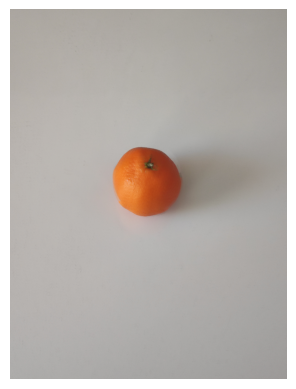

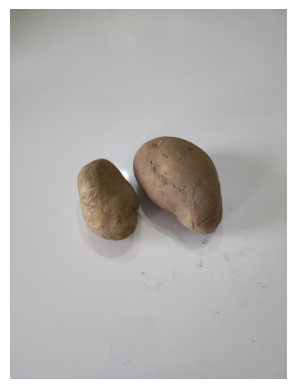

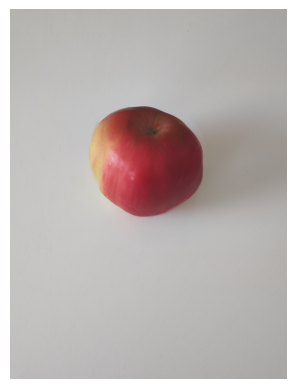

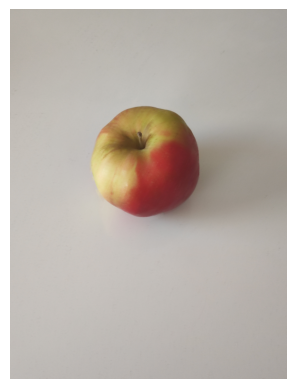

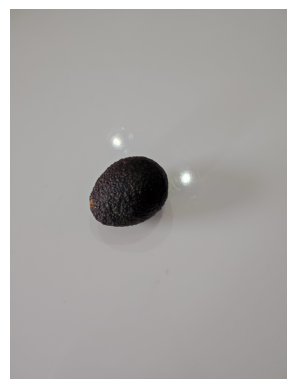

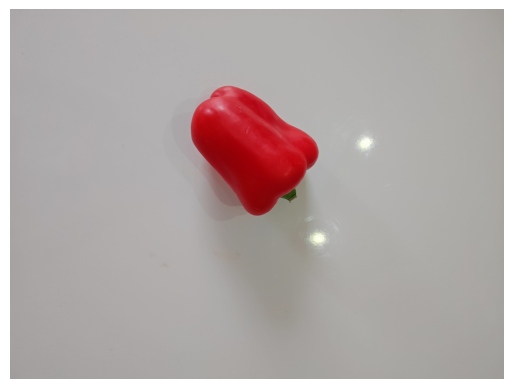

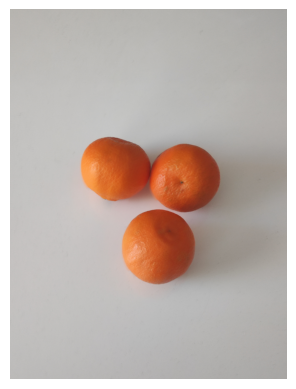

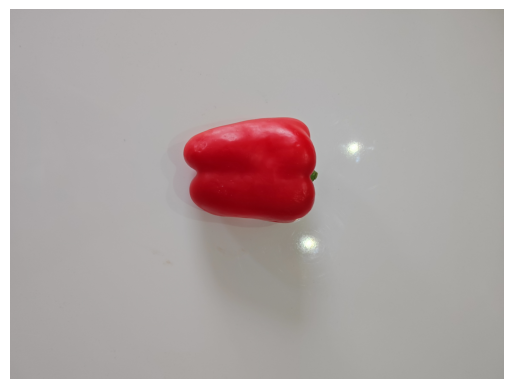

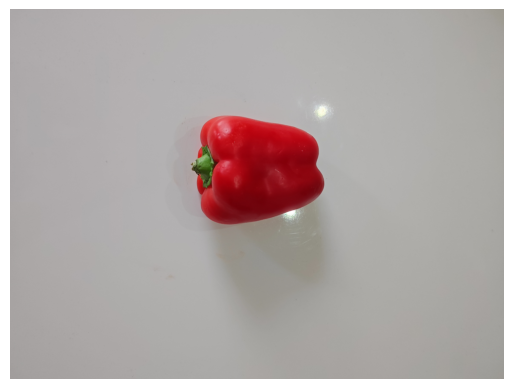

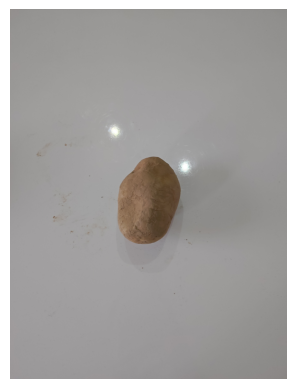

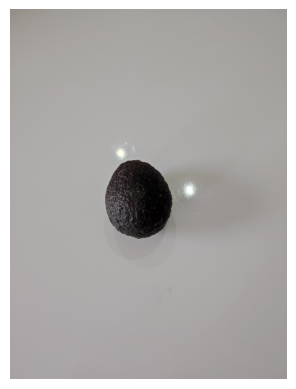

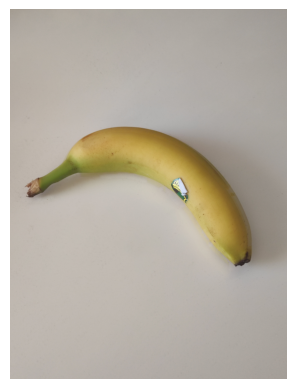

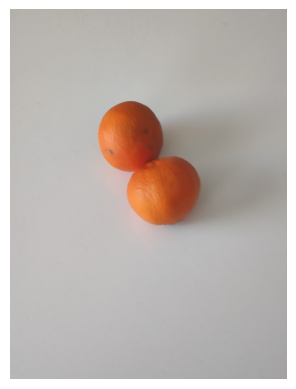

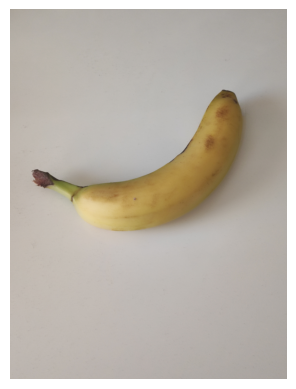

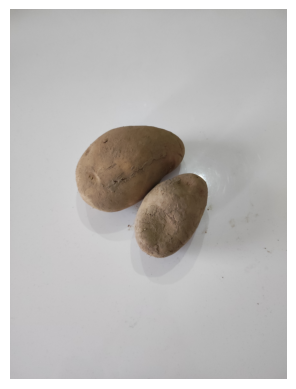

In [8]:
import matplotlib.pyplot as plt
new_images = glob.glob('test/*.jpg')

for image_path in new_images:
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()



# Prediction

In [16]:
new_images = glob.glob('test/*.jpg')

new_data = []
for image_path in new_images:
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    new_data.append(img_array)

new_data = np.vstack(new_data)

predictions_logits = model.predict(new_data)

predictions_probabilities = tf.nn.softmax(predictions_logits, axis=-1)
predicted_classes = np.argmax(predictions_probabilities, axis=-1)

for i, image_path in enumerate(new_images):
    print(f"Image: {image_path[5:]}: {class_names[predicted_classes[i]]}")

1/1 [==============================] - 0s 19ms/step
Image: mandarin3.jpg: apple
Image: avocado1.jpg: apple
Image: apple3.jpg: banana
Image: potato2.jpg: banana
Image: banana3.jpg: banana
Image: mandarin1.jpg: banana
Image: potato4.jpg: banana
Image: apple1.jpg: apple
Image: apple2.jpg: banana
Image: avocado2.jpg: apple
Image: pepper1.jpg: apple
Image: mandarin4.jpg: apple
Image: pepper3.jpg: apple
Image: pepper2.jpg: apple
Image: potato1.jpg: banana
Image: avodaco3.jpg: apple
Image: banana2.jpg: banana
Image: mandarin2.jpg: apple
Image: banana1.jpg: banana
Image: potato3.jpg: banana


In [19]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

def predict_images(model, image_paths):
    predictions = []
    for image_path in image_paths:
        img = image.load_img(image_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        prediction = model.predict(img_array)

        predictions.append(np.argmax(prediction))

    return predictions

predictions = predict_images(model, new_images)

for image_path, prediction in zip(new_images, predictions):
    print(f"Image: {image_path[5:]}: {class_names[prediction]}")

1/1 [==============================] - 0s 18ms/step
Image: mandarin3.jpg: apple
Image: avocado1.jpg: apple
Image: apple3.jpg: apple
Image: potato2.jpg: apple
Image: banana3.jpg: apple
Image: mandarin1.jpg: apple
Image: potato4.jpg: apple
Image: apple1.jpg: apple
Image: apple2.jpg: apple
Image: avocado2.jpg: apple
Image: pepper1.jpg: apple
Image: mandarin4.jpg: apple
Image: pepper3.jpg: apple
Image: pepper2.jpg: apple
Image: potato1.jpg: apple
Image: avodaco3.jpg: apple
Image: banana2.jpg: apple
Image: mandarin2.jpg: apple
Image: banana1.jpg: apple
Image: potato3.jpg: apple
